In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np

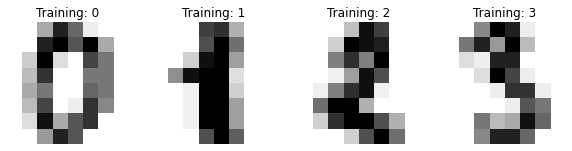

In [20]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

In [21]:
data = datasets.load_digits().images.reshape((len(datasets.load_digits().images), -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, datasets.load_digits().target, test_size=0.5, shuffle=False
)


In [22]:
# Create a classifier
clf = DecisionTreeClassifier()


# Learn the digits on the train subset
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        88
           1       0.78      0.65      0.71        91
           2       0.88      0.71      0.79        86
           3       0.68      0.74      0.71        91
           4       0.80      0.80      0.80        92
           5       0.59      0.75      0.66        91
           6       0.88      0.87      0.87        91
           7       0.89      0.73      0.80        89
           8       0.60      0.67      0.63        88
           9       0.69      0.73      0.71        92

    accuracy                           0.76       899
   macro avg       0.77      0.76      0.76       899
weighted avg       0.77      0.76      0.76       899




In [23]:
# Create a classifier
clf = RandomForestClassifier()


# Learn the digits on the train subset
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.95      0.88      0.91        91
           2       0.97      0.91      0.94        86
           3       0.88      0.86      0.87        91
           4       0.98      0.95      0.96        92
           5       0.89      0.97      0.93        91
           6       0.99      0.99      0.99        91
           7       0.94      0.98      0.96        89
           8       0.88      0.86      0.87        88
           9       0.87      0.93      0.90        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




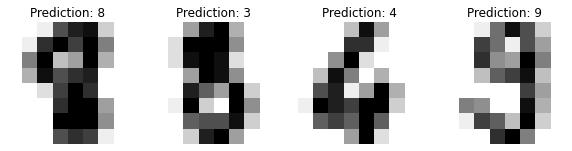

In [24]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
plt.show()

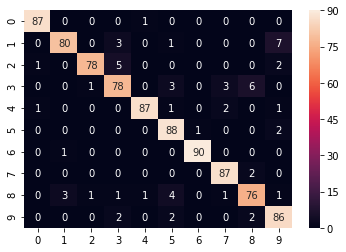

In [25]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True)
plt.show()